# Titanic dataset

### During this analysis I'll try to predict wheter person survives or not titanic catastrophy. 

In [589]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [590]:
#Importing dataset
test = pd.read_csv('test.csv')
y_test = pd.read_csv('gender_submission.csv')
train = pd.read_csv('train.csv')
test['Survived'] = y_test['Survived']
dataset = train.append(test)

## Basic analysis of dataset

In [591]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survival-	Survival	0 = No, 1 = Yes  
pclass-Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  
sex-Sex	 
Age-Age in years  	
sibsp- number of siblings / spouses aboard the Titanic	  
parch-of parents / children aboard the Titanic	  
ticket-Ticket number	  
fare-Passenger fare	  
cabin-Cabin number	  
embarked-Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

In [592]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


### Some information of our data

In [593]:
dataset.describe().applymap(lambda x: round(x, 2))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.00,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00
mean,655.00,0.38,2.29,29.88,0.50,0.39,33.30
std,378.02,0.48,0.84,14.41,1.04,0.87,51.76
min,1.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,328.00,0.00,2.00,21.00,0.00,0.00,7.90
50%,655.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,982.00,1.00,3.00,39.00,1.00,0.00,31.27
max,1309.00,1.00,3.00,80.00,8.00,9.00,512.33


### Few visualizations of our data

In [594]:
numerical_cols = dataset.select_dtypes(np.number).columns[2:]
numerical_cols

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Pclass


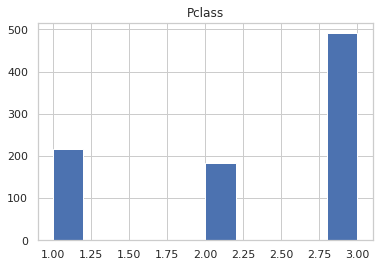

Age


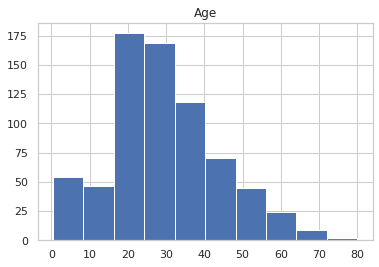

SibSp


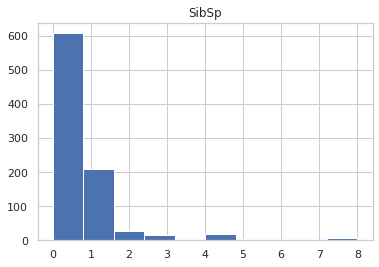

Parch


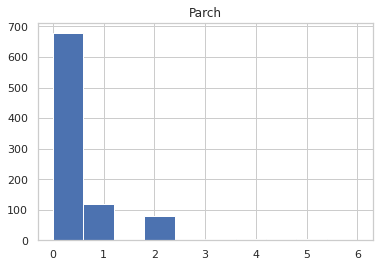

Fare


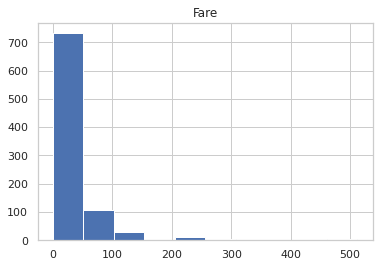

In [595]:
for i in numerical_cols:
    print(i)
    plt.hist(train[i])
    plt.title(i)
    plt.show()

### Pearson Correlation

<AxesSubplot:>

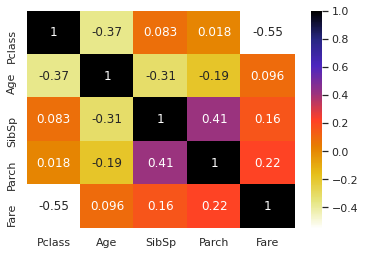

In [596]:
sns.heatmap(train[numerical_cols].corr(), annot=True, cmap=plt.cm.CMRmap_r)

As we can see age is correlated with Pclass  
Sibsp (the number of siblings/spouses on board) is correlated with Parch - number of parents/children on board.  
Fare is correlated with Pclass (More expensive tickets are associated with higher standards)

### Let's take a look at visualisation of our categorical values in dataset

In [597]:
caterogical_cols = ['Pclass', 'Sex', 'Embarked','Survived']
dataset[caterogical_cols].head()


,Pclass,Sex,Embarked,Survived
0,3,male,S,0
1,1,female,C,1
2,3,female,S,1
3,1,female,S,1
4,3,male,S,0


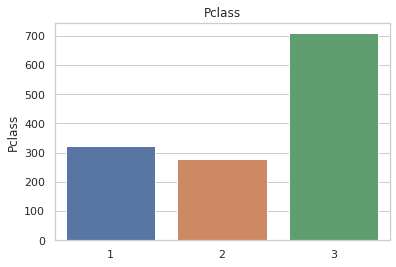

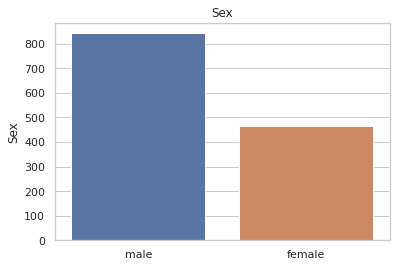

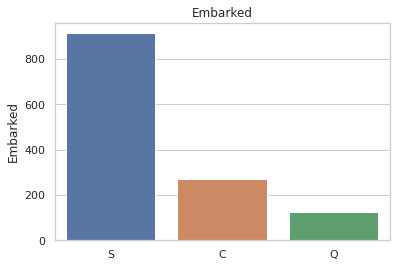

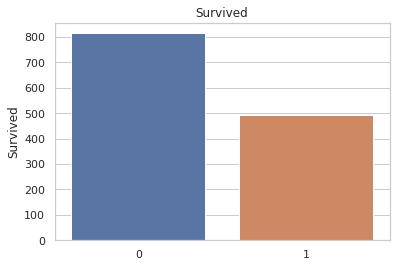

In [598]:
for i in caterogical_cols:
    sns.set_theme(style="whitegrid")
    sns.barplot(x=dataset[i].value_counts().index, y=dataset[i].value_counts()).set_title(i)
    plt.show()

In [599]:
dataset[caterogical_cols].head()

,Pclass,Sex,Embarked,Survived
0,3,male,S,0
1,1,female,C,1
2,3,female,S,1
3,1,female,S,1
4,3,male,S,0


### Let's see if statistically any of the categories made survival easier

In [600]:
for i in caterogical_cols[:-1]:
    df = pd.DataFrame(dataset[i].value_counts(), index = dataset[i].unique())
    for j in dataset[i].unique():
        filt = (dataset[i]==j) & (dataset['Survived']==1)
        df.loc[j,'Survival%'] = round(dataset[filt]['Survived'].count()/df.loc[j,i], 2)
    print(df)

   Pclass  Survival%
3     709       0.27
1     323       0.58
2     277       0.42
        Sex  Survival%
male    843       0.13
female  466       0.83
     Embarked  Survival%
S       914.0       0.33
C       270.0       0.49
Q       123.0       0.44
NaN       NaN        NaN


As we can see, women had the best chance of survival (83% of them survived). In second place is the ticket class. Survival was not facilitated by being born male (only 13% made it).

## Data cleaning and data processing


Importing libraries

In [613]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


PassengerId, Name, Ticket  are not important for us. Let's get  rid of them.


In [602]:
dataset = dataset.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


This is the dataset we will work on.

In [603]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


Let's find out how many NaN value we have in each column

In [604]:
for i in dataset.columns:
    print(i, dataset[i].isna().sum())

Survived 0
Pclass 0
Sex 0
Age 263
SibSp 0
Parch 0
Fare 1
Cabin 1014
Embarked 2


We should delete Cabin as well. There's too much unknown variables. We can also drop 2 rows with unknown in Embarked column and 1 from Fare.

In [605]:
dataset = dataset.drop(['Cabin'], axis=1)

In [606]:
dataset = dataset.dropna(axis=0, subset = ['Embarked','Fare'])

In [607]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


Replacing NaN values in Age column with mean of Age

In [621]:
mean = dataset['Age'].mean()
dataset['Age']= dataset['Age'].replace(np.nan, round(mean))
dataset.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Splitting the data

In [609]:
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

### Encoding 

Sex

In [610]:
X['Sex']=X['Sex'].apply(lambda x: 1 if x=='male' else 0)

Embarked

In [611]:
col_transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Embarked'])], remainder='passthrough')
X = np.array(col_transformer.fit_transform(X))


Train test split:

In [647]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33)

### Feature scaling

In [648]:
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_test[:,3:]=sc.transform(X_test[:,3:])

## Predictions

Libraries

In [751]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
import tensorflow as tf

### KNN

In [752]:
classifier_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)

Accuracy and confusion matrix

In [753]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[246  26]
 [ 34 125]]


0.8607888631090487

As we can see the accuracy of our model is about 86%.

### Logistic regression

In [754]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
y_pred = classifier_lr.predict(X_test)

Accuracy and confusion matrix

In [755]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[253  19]
 [ 33 126]]


0.8793503480278422

### SVM

Linear kernel

In [756]:
classifier_svm = SVC(kernel='linear')
classifier_svm.fit(X_train, y_train)
y_pred = classifier_svm.predict(X_test)

Accuracy and confusion matrix

In [757]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[251  21]
 [ 30 129]]


0.8816705336426914

Poly kernel

In [758]:
classifier_svm = SVC(kernel='poly')
classifier_svm.fit(X_train, y_train)
y_pred = classifier_svm.predict(X_test)


Accuracy and confusion matrix

In [759]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[258  14]
 [ 31 128]]


0.8955916473317865

rbf kernel

In [765]:
classifier_svm = SVC(kernel='rbf')
classifier_svm.fit(X_train, y_train)
y_pred = classifier_svm.predict(X_test)


Accuracy and confusion matrix

In [766]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[257  15]
 [ 32 127]]


0.8909512761020881

# Neural network

In [748]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
28/28 [==============================] - 1s 7ms/step - loss: 0.6150 - accuracy: 0.7455
Epoch 2/5
28/28 [==============================] - 0s 7ms/step - loss: 0.4060 - accuracy: 0.8412
Epoch 3/5
28/28 [==============================] - 0s 10ms/step - loss: 0.3756 - accuracy: 0.8542
Epoch 4/5
28/28 [==============================] - 0s 7ms/step - loss: 0.3689 - accuracy: 0.8540
Epoch 5/5
28/28 [==============================] - 0s 6ms/step - loss: 0.3723 - accuracy: 0.8475


In [749]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

Accuracy and confusion matrix

In [750]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[258  14]
 [ 34 125]]


0.888631090487239

As we can see, the results of all methods are close to each other